# Prerequisites
According to where you execute the code, you will have to install a few packages:
- **Github Codespaces**: ```pip install einops```
- **Local Machine**: ```pip install pytest numpy jupyterlab matplotlib einops```

# Outline
We will review some simple concepts in linear algebra and get you familiar with the tools you will be using:

1. review of vector projections (numpy)
2. batch operations with broadcasting (numpy)
3. tensor operations with the einops/einsum
4. compute signed distance field for line and circle
5. introduction to Git + Github Classroom auto-verification

In [1]:
%matplotlib inline
%reload_ext autoreload 
%autoreload 2
import einops
import numpy as np
import matplotlib.pyplot as plt
from utils import numpy_equal
from utils import setup_figure
from utils import plot_points


# Task 1: vector projection
Please implement `vector_projection(...)` in `task1.py` to implement vector projection.
Let us visualize the *ground truth* result of the operation you are supposed to implement.

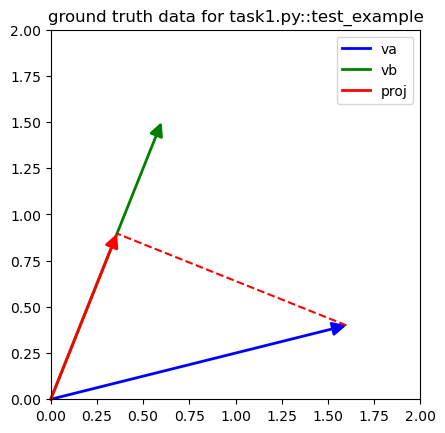

In [2]:
from task1 import example_data
from task1 import plot_result
va, vb, gt = example_data()
setup_figure(scale=2, symmetric=False)
plt.title("ground truth data for task1.py::test_example")
plot_result(va, vb, gt)

You can verify your correct implementatio on *this* example input by running:
```
pytest task1.py::test_example
```
But the exercise is complete only once the full suite of test passes without errors:
```
pytest task1.py
```

In [ ]:
!pytest task1.py::test_example

In [ ]:
!pytest task1.py

# Task 2: batch operations and broadcasting
In many scenarios, you need to do the same computation for many entries (i.e. a "batch" of entries). 
The simplest way to do this is to use a for loop, but for loops in python are notoriously slow.
Numpy replaces for loop with [vectorized operations](https://towardsdatascience.com/how-to-speedup-data-processing-with-numpy-vectorization-12acac71cfca).
Vectorized operations are operations that are performed on arrays, rather than individual elements.
This means that you can perform operations on entire arrays, without having to loop over each element individually. This makes vectorized operations much faster and more efficient than using loops.

For example, let's create a "batch" of random points around the origin, stored as a (10x2) matrix:

In [3]:
A = np.random.rand(100,2) - .5
print(f"A.shape: {A.shape}")
print(f"A (first 5 rows): \n {A[0:5,:]}")

A.shape: (100, 2)
A (first 5 rows): 
 [[ 0.20542101 -0.38481729]
 [-0.35589146 -0.16796037]
 [ 0.42277905 -0.35173415]
 [ 0.15528158  0.38128377]
 [ 0.46408114 -0.27132159]]


And let's visualize them with the provided utility function

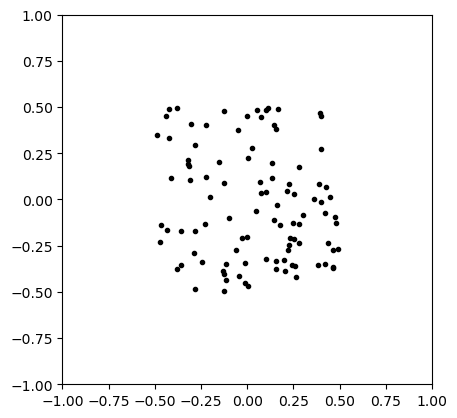

In [4]:
setup_figure(scale=1)
plot_points(A);

In linear algebra, you can only perform operations on matrices only when dimensions match. For example, `C = A + B` is only possible either when `A.shape == B.shape`, or when `B` is a scalar. Conversely, in numpy, we have the concept of **broadcasting**.

With broadcasting, the following code is valid.
With broadcasting, the (2,) array is automatically broadcast to size (100, 2)

A.shape: (100, 2)
B.shape: (2,)


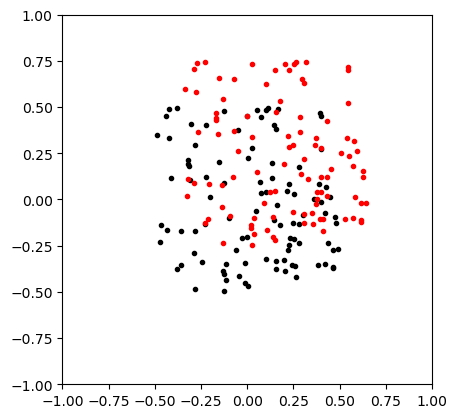

In [5]:
B = np.array([.15, .25])
print(f"A.shape: {A.shape}")
print(f"B.shape: {B.shape}")
A_new = A + B

setup_figure(scale=1.0)
plot_points(A, color="black");
plot_points(A_new, color="red");

Implement `batch_projection(...)` in `task2.py` via broadcasting:

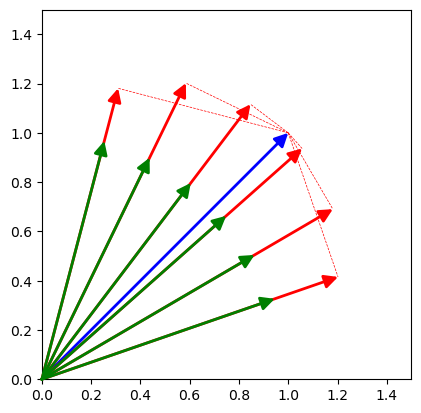

In [6]:
from task2 import *
va, VB, VA_proj_gt = example_data()
plot_result(va, VB, VA_proj_gt)

As before, you can check your implementation is correct with:
```
pytest task2.py
```

In [ ]:
!pytest task2.py

## Task 3: tensor operations
A batch of vectors forms a matrix. Batch of matrices are called tensors. A tensor is a multi-dimensional array of numbers, which is used to represent data in many machine learning and data science applications. Tensors are a direct extension of vectors and matrices, which are special cases of tensors with one and two dimensions, respectively. Just like vectors and matrices, tensors can be added, subtracted, and multiplied by scalars, and they can be combined using tensor operations. In many scenarios, you will need to perform complex tensor operations to transform and extract information from your data.

Libraries like [einops](https://github.com/arogozhnikov/einops) provide a more intuitive and user-friendly interfaces for working with tensors. Einops makes it easy to write code that is both efficient and easy to understand, by providing a simple and concise notation for representing tensor operations. For example, consider the following numpy code to transpose/reshape a tensor:

In [7]:
A = np.random.randn(4, 3, 2)
B = np.transpose(A, axes=(1, 2, 0))
C_numpy = np.reshape(B, (6, 4))

This can be rewritten using einops to make it more compact, readable, and maintanable.

In [8]:
C_einops = einops.rearrange(A, 'a b c -> (b c) a')
assert numpy_equal(C_numpy, C_einops)

Time to pracice.
You are given a tensor (a batch of RGB images of letters 'e', 'i', 'n', 'o', 'p', 's') of shape (6, 96, 96, 3).

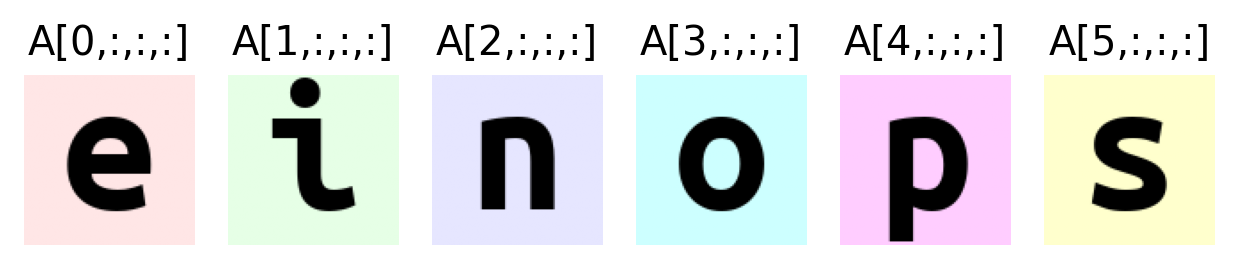

In [9]:
from task3 import *
A, B = example_data()
plot_slices(A)

Now Implement `rearrange(.)` in `task3.py` to convert this tensor to this RGB image; shape=(H=2x96, W=3x96, 3):

B.shape: (192, 288, 3)


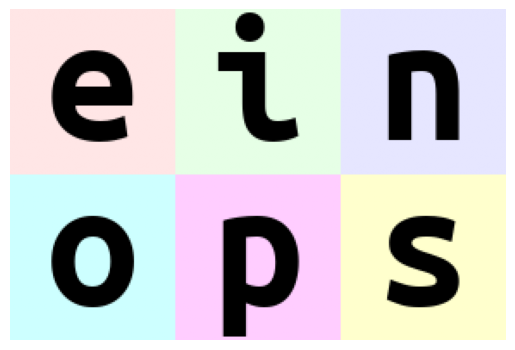

In [10]:
plt.imshow(B); plt.axis("off");
print(f"B.shape: {B.shape}")

In [ ]:
!pytest task3.py

# Task 4: computing signed distance field
Signed distance field (SDF) is a **scalar field** that represents the **distance** of each point in an image or 3D space to a geometric shape. The distance is **signed**, meaning that it can be positive, negative, or zero depending on the location of the point relative to the shape. Points inside the shape have negative distances, points on the shape have a distance of zero, and points outside the shape have positive distances.

SDFs are often used to **represent complex shapes** using a compact set of data, which makes them useful for efficient rendering and storage. Many modern techniques rely on this concept.
In this task, we will practice how to compute SDFs for simple shapes such as lines and circles

Now Implement `compute_line_sdf(.)` and `compute_circle_sdf(.)` in `task4.py` to get the following results.

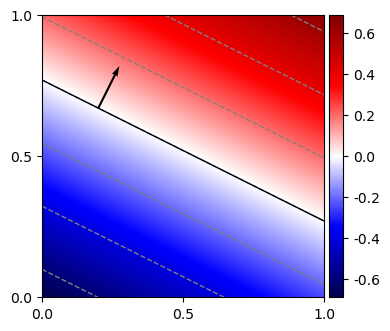

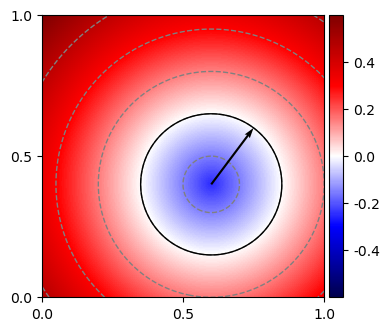

In [11]:
from task4 import *
point, normal, coords, sdf = example_line_data()
plot_sdf(coords, sdf, point, normal)
plt.show()
point, normal, coords, sdf = example_circle_data()
plot_sdf(coords, sdf, point, normal)
plt.show()

In [ ]:
!pytest task4.py

# Task 5: submit your assignment with git (and verify completion)

Now let's save and submit your work using git.
To trigger auto-grading, you need to push your changes to git:

```
git add .
git commit -m "update"
git push origin main
```

After you pushed to github, an **automatic test** will start.
You can see the result at the `Actions` tab on your github repo page.

In [ ]:
!git add .
!git commit -m "update"
!git push origin main